In [80]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import pickle

# 自带训练数据集(波士顿房价)
boston_data = datasets.load_boston()
data_x = boston_data.data
data_y = boston_data.target
data_feature = boston_data.feature_names
print(data_x.shape)
print(data_y.shape)
print(data_feature.shape)

# # 自带训练数据集(体能训练)
# linnerud_data = datasets.load_linnerud()
# data_x = linnerud_data.data
# data_y = linnerud_data.target
# print(data_x.shape)
# print(data_y.shape)


# # 自带训练数据集(鸢尾花数据集)
# iris_data = datasets.load_iris()
# data_x = iris_data.data
# data_y = iris_data.target
# print(data_x.shape)
# print(data_y.shape)



#训练集和测试集划分
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)


#进行回归训练
clf = LinearRegression()
clf.fit(X_train, y_train)
print (clf.coef_)
print (clf.intercept_)


(506, 13)
(506,)
(13,)
(404, 13)
(102, 13)
[-1.01094789e-01  3.63006426e-02  2.71080957e-02  3.31026104e+00
 -1.64181051e+01  3.77526746e+00  7.84798174e-04 -1.40532567e+00
  3.66605727e-01 -1.49737922e-02 -9.99322666e-01  1.14974203e-02
 -5.51897402e-01]
36.41937030377136


In [70]:
# # 原始数据展示
# fig1= plt.figure(figsize=[25,50])
# for i in range(13):
#     plt.subplot(13,  2,  i+1) 
#     plt.scatter(data_x[:,i],data_y)
#     plt.title(str(data_feature[i]) + ' vs target')
#     plt.xlabel('x shep')
#     plt.ylabel('y shep')
# plt.show()


R2得分： 0.6957726757496941
平均平方误差： 23.181870206792638


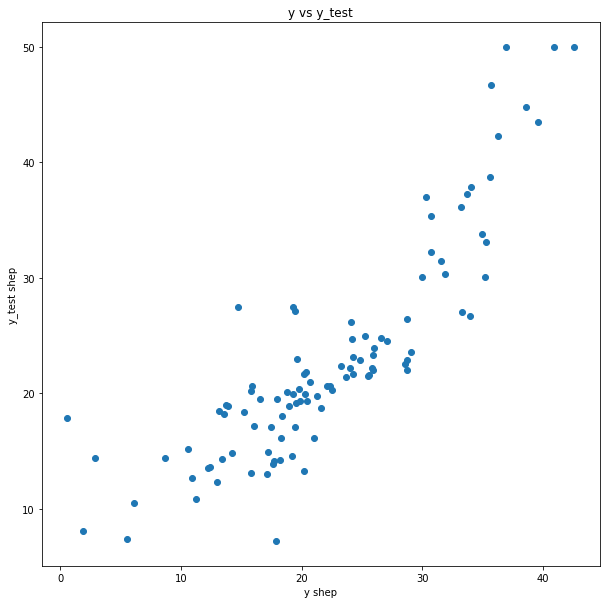

In [81]:
#模型评分
y = clf.predict(X_test)


#进行打分
print('R2得分：', sm.r2_score(y, y_test))
print('平均平方误差：',sm.mean_squared_error(y, y_test))


#可视化数据
fig2= plt.figure(figsize=[10,10])
plt.scatter(y, y_test)
plt.title('y vs y_test')
plt.xlabel('y shep')
plt.ylabel('y_test shep')
plt.show()

In [82]:
# 模型持久化
f = open('./lr.pkl', 'wb') 
pickle.dump(clf, f)
print('dump success lr.pkl')

dump success lr.pkl


R2得分： 0.6845416740643216
平均平方误差： 22.035132703670516


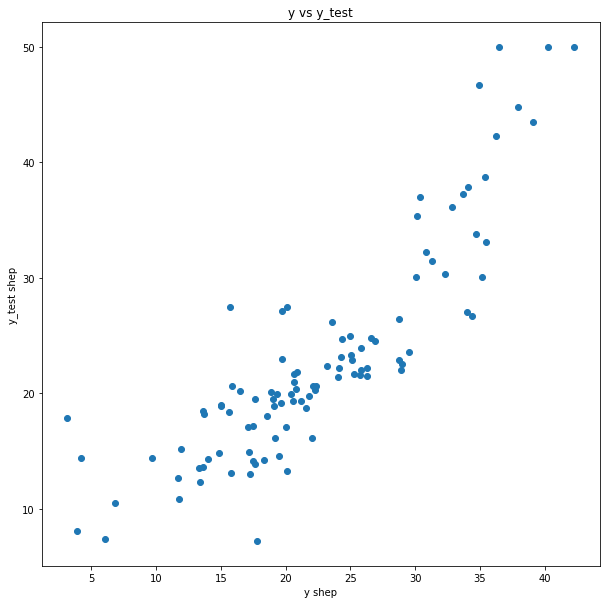

In [86]:
# 模型加载
file = open('./lr.pkl', 'rb') 
model = pickle.load(file)
#模型评分
y = model.predict(X_test)


#进行打分
print('R2得分：', sm.r2_score(y, y_test))
print('平均平方误差：',sm.mean_squared_error(y, y_test))


#可视化数据
fig2= plt.figure(figsize=[10,10])
plt.scatter(y, y_test)
plt.title('y vs y_test')
plt.xlabel('y shep')
plt.ylabel('y_test shep')
plt.show()